<a href="https://colab.research.google.com/github/rjsdn2308/medical.data/blob/main/08_multi_layer_perceptron_and_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 멀티 퍼셉트론 모델

## mnist 데이터셋 불러오기

In [1]:
# mnist 데이터셋 활용해서 멀티 퍼셉트론 모델 만들기
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
x_test.shape

(10000, 28, 28)

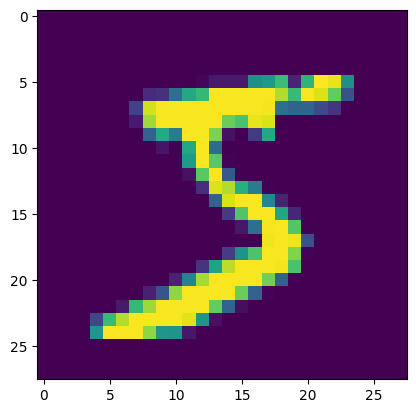

In [5]:
# 손글씨 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [6]:
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [7]:
# 0~1값을 가질 때 딥러닝이 잘 동작하기 떄문에 표준화 진행
x_train = x_train/255
x_test = x_test/255

In [8]:
# 0~9까지의 y값 존재
y_train.min(), y_train.max()

(np.uint8(0), np.uint8(9))

In [9]:
# y값이 범주형이므로 원핫 인코딩 진행
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# 멀티 퍼셉트론 모델 생성
from keras.models import Sequential
from keras.layers import Dense, Flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # 2차원을 1차원으로 변환
model.add(Dense(10, activation='softmax')) # 1차원입력을 10개로 분류

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1) # vervose : 정보를 상세히 출력, epoch, batch_size ppt 참고

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7208 - loss: 1.0771
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8975 - loss: 0.3805
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9131 - loss: 0.3182
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9171 - loss: 0.3017
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9207 - loss: 0.2890
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9222 - loss: 0.2795
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9239 - loss: 0.2728
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9256 - loss: 0.2662
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9262 - loss: 0.2630
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9285 - loss: 0.2582


In [13]:
model.evaluate(x_test, y_test, verbose=0) # loss, accuracy

[0.2677627503871918, 0.9258000254631042]

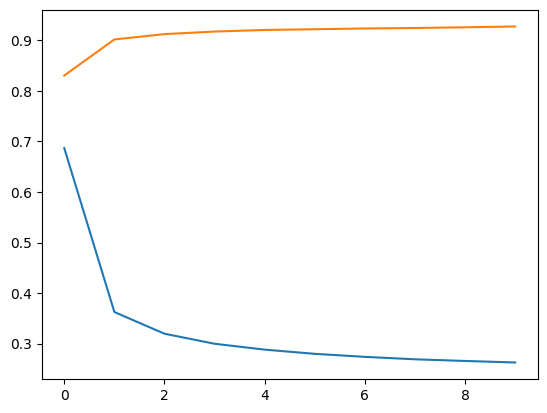

In [14]:
# plot을 통해 model의 loss, accuracy 변화 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [15]:
# 더 좋은 성능을 위해 100개씩의 은닉값을 가진 은닉층 2개 추가
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# vervose : 정보를 상세히 출력, epoch, batch_size ppt 참고
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8289 - loss: 0.6109 - val_accuracy: 0.9463 - val_loss: 0.1808
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9546 - loss: 0.1556 - val_accuracy: 0.9656 - val_loss: 0.1138
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9686 - loss: 0.1052 - val_accuracy: 0.9709 - val_loss: 0.0989
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9763 - loss: 0.0804 - val_accuracy: 0.9691 - val_loss: 0.1025
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9813 - loss: 0.0607 - val_accuracy: 0.9728 - val_loss: 0.0861
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9845 - loss: 0.0499 - val_accuracy: 0.9757 - val_loss: 0.0779
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9863 - loss: 0.0433 - val_accuracy: 0.9763 - val_loss: 0.0767
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9899 - loss: 0.0315 - val_accuracy: 0.

In [18]:
model.evaluate(x_test, y_test, verbose=0)

[0.08381708711385727, 0.9757999777793884]

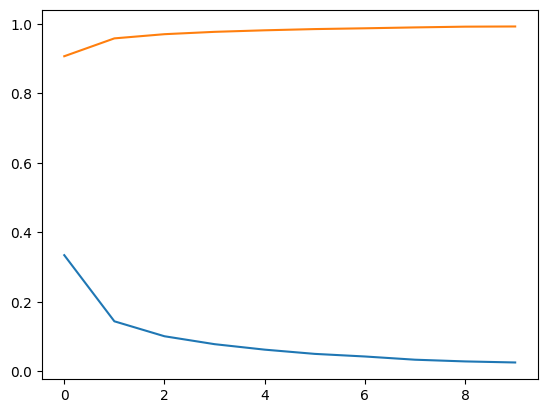

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

실습 1 : 위 학습 결과를 해석해보세요. 그리고 그 근거를 찾아보세요.
- 정확도가 향상되었다. 더 좋은 결과의 모델이다. 과소적합이다. 과대적합이다 등

# CNN

In [20]:
# CNN에 필요한 레이어 추가
from keras.layers import Conv2D, MaxPooling2D

In [21]:
# 모델 생성
conv_model = Sequential()
conv_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
conv_model.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# convolution layer, max pooling layer 추가
conv_model.add(Conv2D(15, (3,3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
# flatten and classification
conv_model.add(Flatten())
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))

In [24]:
# compile
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# 모델 학습
conv_history = conv_model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.7977 - loss: 0.6891 - val_accuracy: 0.9713 - val_loss: 0.0899
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9696 - loss: 0.0956 - val_accuracy: 0.9803 - val_loss: 0.0607
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9799 - loss: 0.0670 - val_accuracy: 0.9832 - val_loss: 0.0501
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.9837 - loss: 0.0525 - val_accuracy: 0.9853 - val_loss: 0.0457
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.9861 - loss: 0.0441 - val_accuracy: 0.9861 - val_loss: 0.0408
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.9882 - val_loss: 0.0372
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9876 - val_loss: 0.0366
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9917 - loss: 0.0273 - 

In [26]:
conv_model.evaluate(x_test, y_test, verbose=0)

[0.03633871674537659, 0.9876000285148621]

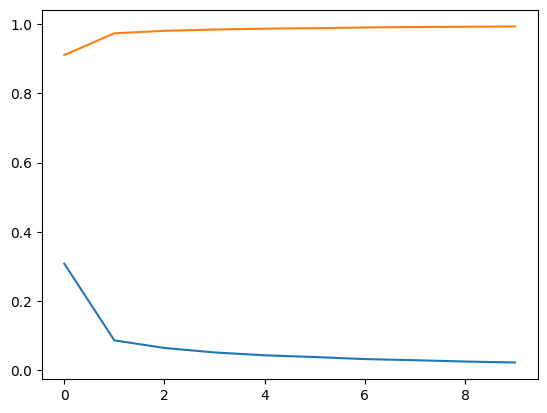

In [27]:
plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['accuracy'])

실습 2 : 위 학습 결과를 해석해보세요. 그리고 그 근거를 찾아보세요.
- 정확도가 향상되었다. 더 좋은 결과의 모델이다. 과소적합이다. 과대적합이다 등